#Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Assignment 01  
**Date:** 04/10/2025  


#**Data Preprocessing**
**Step 1: Load the Dataset**

In this step, I import the required libraries and upload the dataset file using Google Colab's file upload feature.  
After uploading the CSV file (`student_performance.csv`), I read it into a Pandas DataFrame for analysis.  
This step is the foundation for all further preprocessing operations such as handling missing values, normalizing data, and splitting into training and testing sets.


In [ ]:
from google.colab import files
import io
import pandas as pd

print("Please upload your dataset file (e.g., student_performance.csv)")
uploaded = files.upload()

# Assuming the uploaded file is a CSV, let's get its name
file_name = next(iter(uploaded))

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nDataset loaded successfully!")

Please upload your dataset file (e.g., student_performance.csv)


Saving Student_Performance.csv to Student_Performance.csv

Dataset loaded successfully!


**Step 2: Explore the Dataset**

In this step, I display the first five rows of the dataset using the `head()` function to understand the data structure and check for any irregularities.  
I also use the `info()` method to get a summary of the dataset, including data types, column names, and the count of non-null values.  
This helps me identify potential missing data and understand the overall composition of the dataset before preprocessing.


In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                          

**Step 3: Check for Missing Values**

In this step, I check for missing values in each column using the `isnull().sum()` function.  
This allows me to identify if any data cleaning is required before training the model.  
If missing values are found, I can decide whether to remove or replace them using appropriate imputation techniques.


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


**Step 4: Handle Categorical Variables and Normalize Features**

In this step, I separate the dataset into input features (`X`) and the target variable (`y`).  
Categorical columns are identified and converted into numerical form using **one-hot encoding** with `pd.get_dummies()`.  
Boolean columns created during encoding are also converted into integer values (0 and 1).  

After encoding, I normalize the features to ensure that all variables contribute equally to model training.  
Normalization is performed by subtracting the mean and dividing by the standard deviation for each feature.  
This step helps improve the stability and convergence speed of the gradient descent algorithm.


In [ ]:
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X_df = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Identify categorical columns
categorical_cols = X_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X_df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (0s and 1s) if any were created by get_dummies
for col in X_encoded.columns:
    if X_encoded[col].dtype == bool:
        X_encoded[col] = X_encoded[col].astype(int)

# Convert the encoded DataFrame to a NumPy array for normalization
X = X_encoded.values

# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Apply normalization
X_normalized = (X - X_mean) / (X_std + 1e-8)

print("Features have been normalized after handling categorical variables.")
print(f"Dataset contains {X_normalized.shape[0]} samples and {X_normalized.shape[1]} features.")

Features have been normalized after handling categorical variables.
Dataset contains 10000 samples and 5 features.


**Step 5: Split Data into Training, Validation, and Testing Sets**

In this step, I create a custom function to manually split the dataset into three parts:  
- **Training set (64%)** – used to train the model  
- **Validation set (16%)** – used to tune hyperparameters and monitor performance  
- **Testing set (20%)** – used to evaluate the final model’s accuracy and generalization  

The function uses NumPy’s random permutation to shuffle the data and ensure that each subset is randomly distributed.  
This three-way split provides a more reliable evaluation process than a simple train-test division.


In [ ]:
def train_val_test_split(X, y, train_ratio=0.64, val_ratio=0.16, random_state=42):
    """
    Splits data into train, validation, and test sets manually using NumPy.
    """
    np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    train_end = int(train_ratio * X.shape[0])
    val_end = int((train_ratio + val_ratio) * X.shape[0])
    train_idx, val_idx, test_idx = indices[:train_end], indices[train_end:val_end], indices[val_end:]

    X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
    y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

    return X_train, X_val, X_test, y_train, y_val, y_test

# Apply the split
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X_normalized, y)

print(f"Training set size:   {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size:    {X_test.shape[0]} samples")

Training set size:   6400 samples
Validation set size: 1600 samples
Testing set size:    2000 samples


#**Implement Linear Regression**

**Step 6: Define the Hypothesis and Cost Functions**

In this step, I implement the core mathematical components of Linear Regression using NumPy.

- **Hypothesis Function:**  
  The hypothesis represents the predicted output and is defined as  
  \( h(x) = w^T x + b \),  
  where \( w \) is the weight vector and \( b \) is the bias term.

- **Cost Function:**  
  The cost function measures the model’s prediction error and is given by  
  \( J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2 \),  
  where \( m \) is the total number of samples.

These two functions form the foundation for training the linear regression model using gradient descent.
2. Implement Linear Regression

In [ ]:
def hypothesis(X, w, b):
    """
    Implements the hypothesis function: h(x) = w^T * x + b
    """
    return np.dot(X, w) + b

def cost_function(y_true, y_pred):
    """
    Implements the cost function: J = (1/2m) * Σ(h(x) - y)^2
    """
    m = len(y_true)
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)

**Step 7:`calculate_gradients()` Function**

This function computes the **gradients** (partial derivatives) of the **cost function** with respect to the model parameters — **weights (w)** and **bias (b)** — in linear regression.

####  Step-by-Step Explanation:
1. **Input Parameters:**
   - `X`: Input features (matrix of shape m × n).  
   - `y`: Actual target values (vector of shape m).  
   - `w`: Current weights (vector of shape n).  
   - `b`: Current bias (scalar).

2. **Compute Predictions and Errors:**
   - Uses the `hypothesis(X, w, b)` function to predict output values.  
   - Calculates **error** = predicted − actual = `(predictions - y)`.

3. **Compute Gradients:**
   - **Weight Gradient (dw):**  
     Uses vectorized form  
     \[
     dw = \frac{1}{m} X^T (h(X) - y)
     \]
     which adjusts each weight based on the contribution of its feature to the total error.

   - **Bias Gradient (db):**  
     Averages all prediction errors:  
     \[
     db = frac{1}{m} sum (h(X) - y)
     \]

4. **Return Values:**
   - Returns both `dw` and `db` which are later used to update the parameters during **Gradient Descent**.

 **Purpose:**  
To calculate the direction and rate at which `w` and `b` should be updated to minimize the cost function.


In [ ]:
def calculate_gradients(X, y, w, b):
    """
    Calculates the gradients of the cost function.

    This function computes the partial derivatives of the cost function J(w, b)
    with respect to each weight w_j and the bias b.

        ∂J/∂w_j = (1/m) * Σ(h(x) - y) * x_j
        ∂J/∂b   = (1/m) * Σ(h(x) - y)

    Args:
        X (ndarray): Input features (m, n).
        y (ndarray): True target values (m,).
        w (ndarray): Current weights (n,).
        b (float): Current bias.

    Returns:
        tuple: A tuple containing the gradient for weights (dw) and the gradient for bias (db).
    """
    m = X.shape[0]  # Number of training examples

    # Calculate predictions and errors first
    predictions = hypothesis(X, w, b)
    errors = predictions - y

    # Calculate the gradient for weights (dw).
    dw = (1 / m) * np.dot(X.T, errors)

    # Calculate the gradient for bias (db).
    db = (1 / m) * np.sum(errors)

    return dw, db

**Step 8:`gradient_descent()` Function**

This function performs **Gradient Descent**, an optimization algorithm used to minimize the **cost function** by updating the model parameters (`w` and `b`) iteratively.

####  Step-by-Step Explanation:
1. **Inputs:**
   - `X`: Training data features.  
   - `y`: Target/output values.  
   - `w`: Initial weights (vector).  
   - `b`: Initial bias (scalar).  
   - `learning_rate`: Step size (α) controlling how much parameters change per update.  
   - `iterations`: Number of updates to perform.

2. **Initialize Cost Tracking:**
   - `cost_history` list is used to record the cost value after each iteration, helpful for plotting learning curves.

3. **Main Loop (for each iteration):**
   - **Step 1:** Compute gradients using `calculate_gradients(X, y, w, b)`.  
     - `dw`: Gradient with respect to weights.  
     - `db`: Gradient with respect to bias.
     
   - **Step 2:** Update parameters using the gradient descent rule:
     \[
     w := w - alpha \cdot dw
     \]
     \[
     b := b - \alpha \cdot db
     \]
     These updates move the parameters in the direction of **minimum cost**.

   - **Step 3:** Compute and store the cost after each iteration to monitor the algorithm’s progress.

4. **Return Values:**
   - Final optimized `w` and `b` values.  
   - `cost_history` showing how the cost decreased over time.

 **Purpose:**  
To iteratively adjust model parameters so that the cost function is minimized, leading to the best-fitting line for linear regression.


In [ ]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    """
    Performs gradient descent by repeatedly calculating gradients and updating parameters.

    This function implements the main gradient descent algorithm:
        w := w - α * (gradient_w)
        b := b - α * (gradient_b)

    Args:
        X (ndarray): Training features.
        y (ndarray): Training targets.
        w (ndarray): Initial weights.
        b (float): Initial bias.
        learning_rate (float): The learning rate (alpha).
        iterations (int): The number of iterations.

    Returns:
        tuple: Final weights, final bias, and the history of the cost.
    """
    cost_history = []

    for i in range(iterations):
        # Step 1: Calculate the gradients using our dedicated function.
        # dw represents ∂J/∂w, and db represents ∂J/∂b
        dw, db = calculate_gradients(X, y, w, b)

        # Step 2: Apply the update rules for the parameters.
        # w_j := w_j - α * dw_j
        w = w - learning_rate * dw

        # b := b - α * db
        b = b - learning_rate * db

        # Store the cost of the new parameters to visualize the learning progress.
        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

#**Evaluation**

**Step 9: Hyperparameter Search and Final Training**

In this step, I perform **hyperparameter tuning** to find the best learning rate for the gradient descent algorithm.  
I test multiple learning rates and select the one that gives the **lowest validation Mean Squared Error (MSE)**.  
This helps ensure that the model converges efficiently without overshooting the minimum.

After finding the best learning rate, I retrain the model using both the training and validation sets to form a **final optimized model**.  
This final model is then ready for testing and evaluation on unseen data to measure its generalization performance.


In [ ]:
print("--- Searching for the best learning rate ---")
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
best_val_mse, best_params = float('inf'), {}

for lr in learning_rates:
    print(f"Testing learning rate: {lr}... ", end="")
    w, b, t_costs, v_costs = gradient_descent_with_early_stopping(
        X_train, y_train, X_val, y_val, learning_rate=lr
    )
    if v_costs[-1] < best_val_mse:
        best_val_mse = v_costs[-1]
        best_params = {'lr': lr, 'w': w, 'b': b, 't_costs': t_costs, 'v_costs': v_costs}

best_lr = best_params['lr']
print(f"\n--- Best learning rate found: {best_lr} ---")

# Train Model
print("\n--- Training final model on all available training data ---")
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])
w_final, b_final, _, _ = gradient_descent_with_early_stopping(
    X_train_full, y_train_full, X_test, y_test, learning_rate=best_lr
)
print("Final model training complete.")

--- Searching for the best learning rate ---
Testing learning rate: 0.1... Early stopping triggered at iteration 129.
Testing learning rate: 0.05... Early stopping triggered at iteration 213.
Testing learning rate: 0.01... Early stopping triggered at iteration 874.
Testing learning rate: 0.005... Early stopping triggered at iteration 1705.
Testing learning rate: 0.001... 
--- Best learning rate found: 0.005 ---

--- Training final model on all available training data ---
Early stopping triggered at iteration 2327.
Final model training complete.


**Step 10: Model Evaluation on Test Data**

In this step, I evaluate the performance of the final linear regression model using several key metrics:

- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.  
- **Root Mean Squared Error (RMSE):** Provides the error in the same unit as the target variable, making it more interpretable.  
- **Mean Absolute Error (MAE):** Represents the average of absolute differences between predictions and true values.  
- **R² (R-squared):** Indicates how much of the variance in the target variable is explained by the model.  
- **Adjusted R²:** Adjusts R² for the number of predictors, providing a more accurate measure for multiple features.

After calculating these metrics, I can assess how well the trained model generalizes to unseen data.


In [ ]:
def evaluate_model(y_true, y_pred, n_features):
    """Calculates multiple evaluation metrics for our model."""
    n = len(y_true)
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2, 'Adjusted R²': adj_r2}

# Make predictions on the test set
test_predictions = hypothesis(X_test, w_final, b_final)

# Calculate metrics
metrics = evaluate_model(y_test, test_predictions, X_train.shape[1])

print("\n" + "="*50)
print("Final Model Evaluation on the Test Set")
print("="*50)
print(f"Mean Squared Error (MSE): {metrics['MSE']:.4f}")
print(f"R-squared (R²):           {metrics['R²']:.4f}")
print(f"Mean Absolute Error (MAE):  {metrics['MAE']:.4f}")


Final Model Evaluation on the Test Set
Mean Squared Error (MSE): 4.1837
R-squared (R²):           0.9888
Mean Absolute Error (MAE):  1.6216


**Step 11: Visualization Learning Curve and Prediction Accuracy**

In this step, I visualize two important aspects of the model’s performance:

1. **Learning Curve (Left Plot):**  
   This graph shows how the **training** and **validation losses (MSE)** change with each iteration of gradient descent.  
   - A smooth decrease in both curves indicates good learning progress.  
   - If the validation loss stops decreasing or increases, it suggests **overfitting**, and early stopping helps prevent that.

2. **Predictions vs Actual Values (Right Plot):**  
   This scatter plot compares the **actual target values** with the **model’s predictions** on the test set.  
   - Points close to the red dashed line (perfect prediction line) indicate accurate predictions.  
   - The plot provides a clear visual understanding of how well the model generalizes to unseen data.


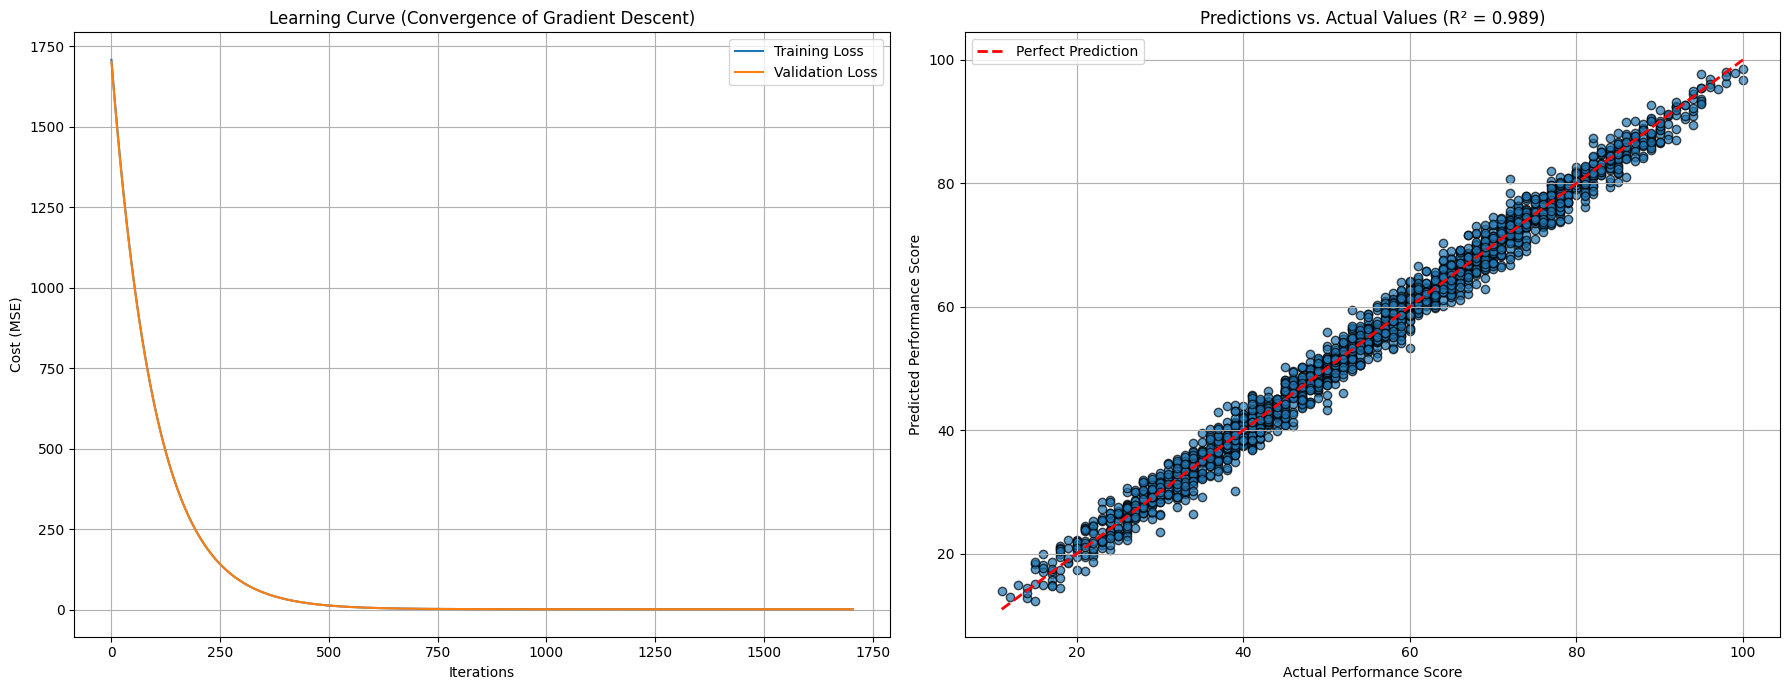

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Learning Curve
axes[0].plot(best_params['t_costs'], label='Training Loss')
axes[0].plot(best_params['v_costs'], label='Validation Loss')
axes[0].set_title('Learning Curve (Convergence of Gradient Descent)')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Cost (MSE)')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Predictions vs Actual Values
axes[1].scatter(y_test, test_predictions, alpha=0.7, edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_title(f'Predictions vs. Actual Values (R² = {metrics["R²"]:.3f})')
axes[1].set_xlabel('Actual Performance Score')
axes[1].set_ylabel('Predicted Performance Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Step 12: Model Diagnostics and Feature Analysis**

This step evaluates how well the model performs and which features influence predictions.

1. **Residual Plot (Left):**  
   Shows the difference between actual and predicted values.  
   - Random scatter around zero indicates a good fit.  
   - Patterns suggest missing relationships or bias.

2. **Error Distribution (Right):**  
   Displays how prediction errors are spread.  
   - A symmetric shape around zero means balanced predictions.  
   - Skewness or outliers indicate possible model issues.

3. **Feature Importance:**  
   Lists features ranked by weight magnitude.  
   - Larger weights have stronger impact.  
   - Positive weights increase predictions, while negative ones reduce them.


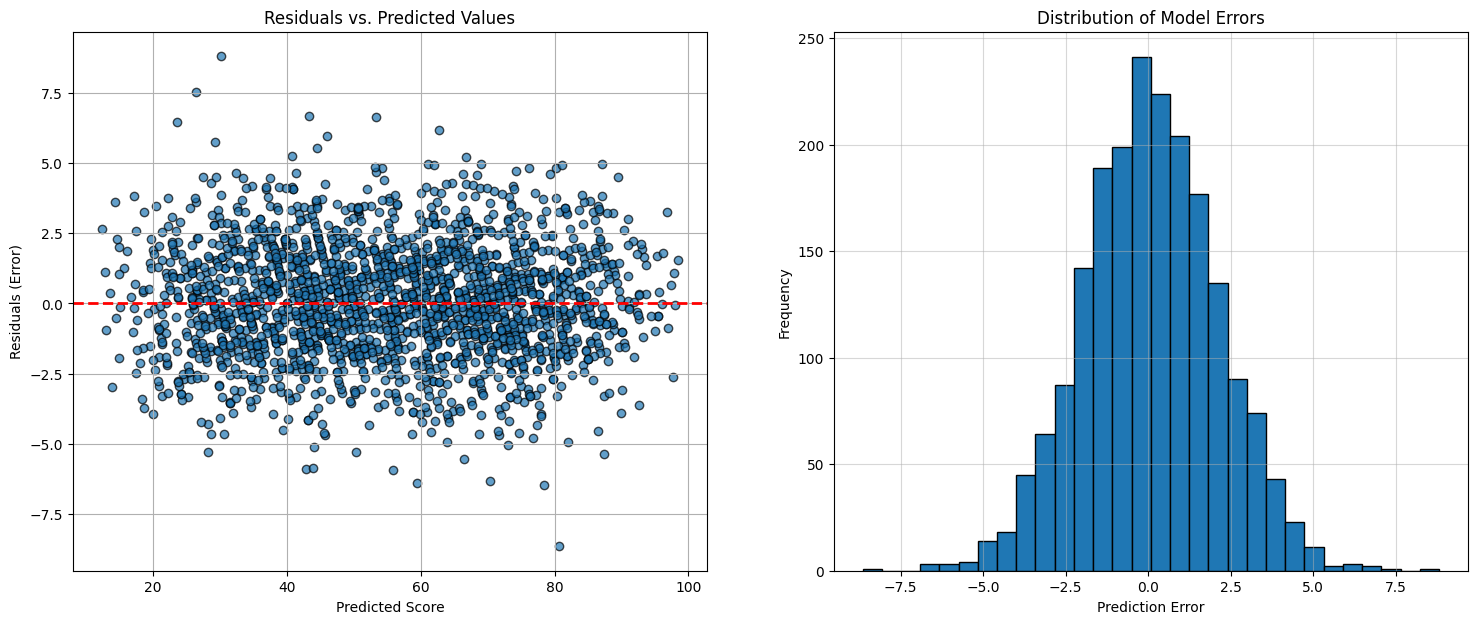


FEATURE IMPORTANCE ANALYSIS
Features ranked by the absolute magnitude of their learned weights.
                         Feature    Weight
                 Previous Scores 17.665582
                   Hours Studied  7.382464
      Extracurricular Activities  0.811506
                     Sleep Hours  0.577539
Sample Question Papers Practiced  0.307623


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Residual Plot
residuals = y_test - test_predictions
axes[0].scatter(test_predictions, residuals, alpha=0.7, edgecolors='k')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_title('Residuals vs. Predicted Values')
axes[0].set_xlabel('Predicted Score')
axes[0].set_ylabel('Residuals (Error)')
axes[0].grid(True)

# Plot 2: Distribution of Residuals
axes[1].hist(residuals, bins=30, edgecolor='k')
axes[1].set_title('Distribution of Model Errors')
axes[1].set_xlabel('Prediction Error')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.5)

plt.show()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': w_final
}).sort_values('Weight', key=abs, ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print("Features ranked by the absolute magnitude of their learned weights.")
print(feature_importance.to_string(index=False))

#**Summary**

In this assignment, I implemented **Linear Regression** completely from scratch using NumPy.  
I carried out all major steps — **data preprocessing**, **training using gradient descent with early stopping**, and **model evaluation** using metrics such as MSE, MAE, and R².  
Through visualizations like learning curves, prediction comparisons, and residual plots, I analyzed the model’s performance and accuracy.  
Lastly, the **feature importance analysis** helped identify which variables most significantly affected the target outcome.
